0.0    79912
1.0    40305
Name: Superhost, dtype: int64


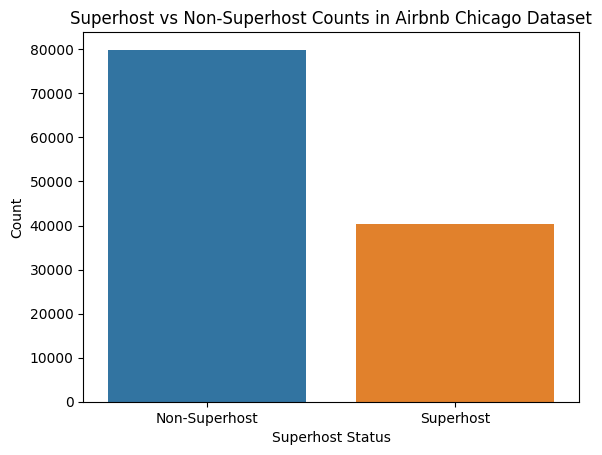

In [1]:
#The ratio of Non-superhost vs Superhost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('airbnb_Chicago.csv')

print(df['Superhost'].value_counts())

# Count the occurrences of each category
superhost_counts = df['Superhost'].value_counts()

# Create a bar plot
sns.barplot(x=superhost_counts.index, y=superhost_counts.values)
plt.xlabel('Superhost Status')
plt.ylabel('Count')
plt.title('Superhost vs Non-Superhost Counts in Airbnb Chicago Dataset')
plt.xticks([0, 1], ['Non-Superhost', 'Superhost'])  # Rename x-ticks for clarity
plt.show()


Total Revenue:
Superhost
0.0    155803485.0
1.0    115221787.0
Name: revenue, dtype: float64


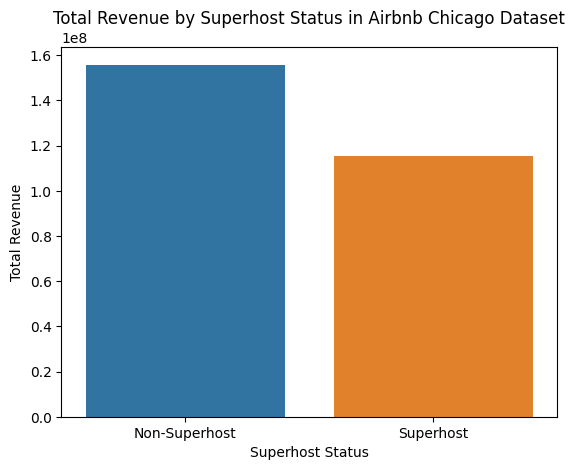

In [2]:
#The revenue ratio of Non-superhost vs Superhost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('airbnb_Chicago.csv')

# Group by 'Superhost' and calculate the sum of 'revenue'
revenue_by_superhost = df.groupby('Superhost')['revenue'].sum()
print("Total Revenue:")
print(revenue_by_superhost)

# Create a bar plot for revenue
sns.barplot(x=revenue_by_superhost.index, y=revenue_by_superhost.values)
plt.xlabel('Superhost Status')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Superhost Status in Airbnb Chicago Dataset')
plt.xticks([0, 1], ['Non-Superhost', 'Superhost'])  # Rename x-ticks for clarity
plt.show()

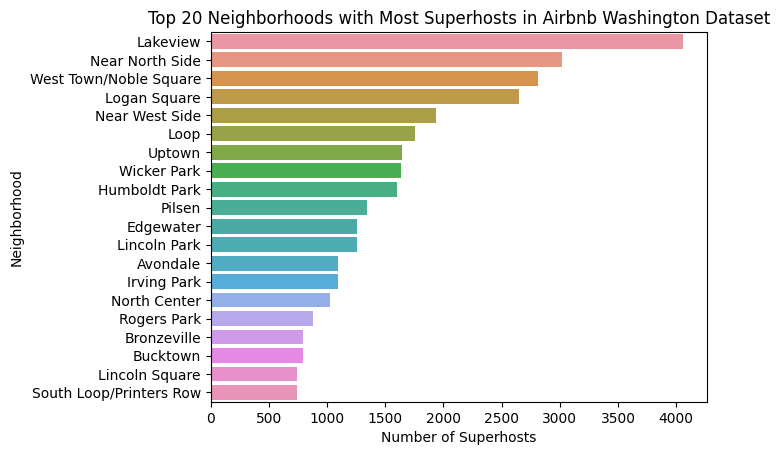

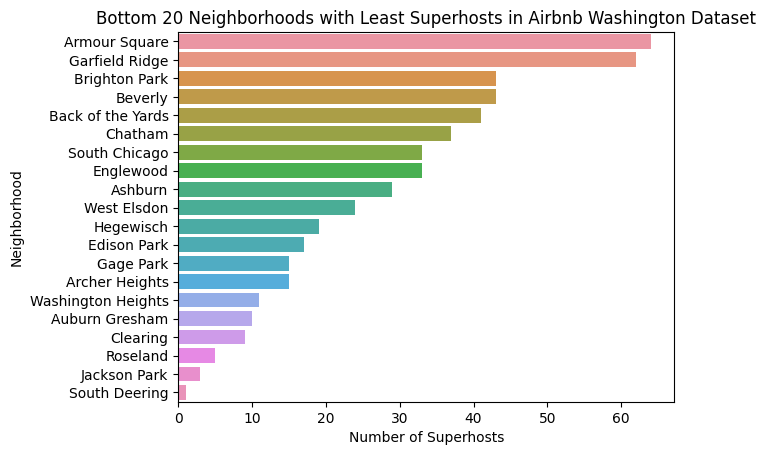

In [ ]:
#The ratio of Superhosts in each neighborhood
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('airbnb_Chicago.csv')

# Filter out only superhosts
superhosts = df[df['Superhost'] == 1]

# Group by neighborhood and count
superhost_counts = superhosts.groupby('Neighborhood').size()

# Sort the counts
superhost_counts_sorted = superhost_counts.sort_values(ascending=False)
top_20_neighborhoods = superhost_counts_sorted.head(20)
bottom_20_neighborhoods = superhost_counts_sorted.tail(20)

# Plot for Top 20 Neighborhoods
sns.barplot(x=top_20_neighborhoods.values, y=top_20_neighborhoods.index)
plt.xlabel('Number of Superhosts')
plt.ylabel('Neighborhood')
plt.title('Top 20 Neighborhoods with Most Superhosts in Airbnb Washington Dataset')
plt.show()

# Plot for Bottom 20 Neighborhoods
sns.barplot(x=bottom_20_neighborhoods.values, y=bottom_20_neighborhoods.index)
plt.xlabel('Number of Superhosts')
plt.ylabel('Neighborhood')
plt.title('Bottom 20 Neighborhoods with Least Superhosts in Airbnb Washington Dataset')
plt.show()

In [ ]:
##############################################################

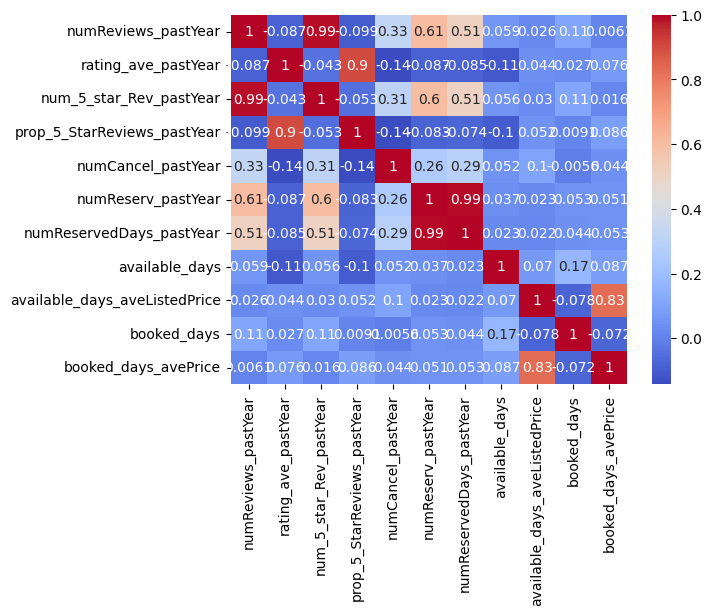

In [ ]:
#Pre-process the data
#1-Determine high relation(Multicolinearity) variables

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('airbnb_Chicago.csv')

# List of predictor variables
predictor_vars = ['numReviews_pastYear', 'rating_ave_pastYear', 'num_5_star_Rev_pastYear',
                  'prop_5_StarReviews_pastYear', 'numCancel_pastYear', 'numReserv_pastYear',
                  'numReservedDays_pastYear', 'available_days', 'available_days_aveListedPrice',
                  'booked_days', 'booked_days_avePrice']

# Create a subset of the DataFrame with only predictor variables
df_subset = df[predictor_vars]

# Compute the correlation matrix for the subset
corr_matrix = df_subset.corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# You might want to look for high correlations (> 0.75 or < -0.75) to identify multicollinearity

# Remove rows with missing values in these columns only
df = df.dropna(subset=predictor_vars)

In [ ]:
# Assuming df is your DataFrame and predictor_vars is the list of your variables
vif_data = pd.DataFrame()
vif_data["feature"] = predictor_vars
vif_data["VIF"] = [variance_inflation_factor(df[predictor_vars].values, i) for i in range(len(predictor_vars))]

print(vif_data)

                          feature        VIF
0             numReviews_pastYear  61.293549
1             rating_ave_pastYear  74.138861
2         num_5_star_Rev_pastYear  59.681616
3     prop_5_StarReviews_pastYear  58.270823
4              numCancel_pastYear   1.271473
5              numReserv_pastYear   9.156197
6        numReservedDays_pastYear   8.276003
7                  available_days   8.115877
8   available_days_aveListedPrice   5.554990
9                     booked_days   2.761286
10           booked_days_avePrice   6.108991


In [ ]:
# Remove high VIF variables and re-define predictors
# Re-defein List of predictor variables


predictor_vars = ['num_5_star_Rev_pastYear', 'prop_5_StarReviews_pastYear', 'numCancel_pastYear',
                  'numReserv_pastYear', 'available_days', 'booked_days', 'booked_days_avePrice'
                  ]
vif_data = pd.DataFrame()
vif_data["feature"] = predictor_vars
vif_data["VIF"] = [variance_inflation_factor(df[predictor_vars].values, i) for i in range(len(predictor_vars))]

print(vif_data)

                       feature       VIF
0      num_5_star_Rev_pastYear  2.284213
1  prop_5_StarReviews_pastYear  6.805999
2           numCancel_pastYear  1.207004
3           numReserv_pastYear  2.029996
4               available_days  6.403228
5                  booked_days  2.713576
6         booked_days_avePrice  2.070425


In [ ]:
# Define a logit formula
formula = 'Superhost ~ num_5_star_Rev_pastYear + prop_5_StarReviews_pastYear + numCancel_pastYear + numReserv_pastYear + available_days + booked_days + booked_days_avePrice'

# Fit the model
model = smf.logit(formula, data=df).fit()

# Print out the statistics
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.467998
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                72691
Model:                          Logit   Df Residuals:                    72683
Method:                           MLE   Df Model:                            7
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.3165
Time:                        22:23:49   Log-Likelihood:                -34019.
converged:                       True   LL-Null:                       -49774.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -9.8066      0.096   -102.056      0.000   

In [ ]:
############################################################################################

In [ ]:
# DID analysis, to split the data based on their evaluation period
# Split the data based on Scraped Date
import pandas as pd

df = pd.read_csv('airbnb_Chicago.csv')

# Convert 'Scraped Date' to datetime
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

def assign_evaluation_period(date):
    year = date.year
    if date.month in [1, 2, 3]:
        return f'Jan_{year}'
    elif date.month in [4, 5, 6]:
        return f'April_{year}'
    elif date.month in [7, 8, 9]:
        return f'July_{year}'
    else:
        return f'Oct_{year}'

# Apply the function to create a new column for evaluation period
df['Evaluation Period'] = df['Scraped Date'].apply(assign_evaluation_period)
# Check the first few rows to verify the new column
print(df.head())

   Airbnb Host ID  Airbnb Property ID   City_x  superhost_period_all  \
0          2153.0              1947.0  Chicago                  13.0   
1          2153.0              1947.0  Chicago                  15.0   
2          2153.0              1947.0  Chicago                  18.0   
3          2153.0              1947.0  Chicago                  19.0   
4          2153.0              1947.0  Chicago                  20.0   

   scrapes_in_period Scraped Date  superhost_observed_in_period  \
0               15.0   2018-08-05                          15.0   
1               14.0   2019-02-12                          14.0   
2               28.0   2019-11-05                          28.0   
3               41.0   2020-02-02                          41.0   
4               33.0   2020-05-01                          33.0   

   host_is_superhost_in_period  superhost_ratio  prev_superhost_period_all  \
0                          0.0              0.0                       12.0   
1       

In [ ]:
# Group 1 Non-superhost all the way
# Extract data for the Jan_2018 evaluation period
jan_2018_df = df[df['Evaluation Period'] == 'Jan_2018']

# Filter for hosts who were not Superhosts and did not become Superhosts
group1_df = jan_2018_df[(jan_2018_df['prev_host_is_superhost'] == 0) & (jan_2018_df['superhost_change_gain_superhost'] == 0)]

# Check and drop missing values for Group 1
initial_count_group1 = group1_df.shape[0]
cleaned_group1_df = group1_df.dropna(subset=['revenue', 'prev_revenue'])
final_count_group1 = cleaned_group1_df.shape[0]
rows_lost_group1 = initial_count_group1 - final_count_group1

print(f"Group 1 - Rows before dropping missing values: {initial_count_group1}")
print(f"Group 1 - Rows after dropping missing values: {final_count_group1}")
print(f"Group 1 - Rows lost during cleaning: {rows_lost_group1}")

avg_prev_revenue = cleaned_group1_df['prev_revenue'].mean()
avg_current_revenue = cleaned_group1_df['revenue'].mean()

print(f"Average revenue from T0 ~ T1: {avg_prev_revenue}")
print(f"Average revenue from T0 ~ T1: {avg_current_revenue}")

Group 1 - Rows before dropping missing values: 4397
Group 1 - Rows after dropping missing values: 2057
Group 1 - Rows lost during cleaning: 2340
Average revenue before becoming Superhost: 2220.333981526495
Average revenue after becoming Superhost: 4194.397180359747


In [ ]:
# Group 2 From Non-superhost to become Superhost
# Filter for hosts who were not Superhosts but became Superhosts
group2_df = jan_2018_df[(jan_2018_df['prev_host_is_superhost'] == 0) & (jan_2018_df['superhost_change_gain_superhost'] == 1)]

# Check and drop missing values for Group 2
initial_count_group2 = group2_df.shape[0]
cleaned_group2_df = group2_df.dropna(subset=['revenue', 'prev_revenue'])
final_count_group2 = cleaned_group2_df.shape[0]
rows_lost_group2 = initial_count_group2 - final_count_group2

print(f"Group 2 - Rows before dropping missing values: {initial_count_group2}")
print(f"Group 2 - Rows after dropping missing values: {final_count_group2}")
print(f"Group 2 - Rows lost during cleaning: {rows_lost_group2}")

avg_prev_revenue = cleaned_group2_df['prev_revenue'].mean()
avg_current_revenue = cleaned_group2_df['revenue'].mean()

print(f"Average revenue from T0 ~ T1: {avg_prev_revenue}")
print(f"Average revenue from T0 ~ T1: {avg_current_revenue}")

Group 2 - Rows before dropping missing values: 632
Group 2 - Rows after dropping missing values: 376
Group 2 - Rows lost during cleaning: 256
Average revenue from T0 ~ T1: 2869.369680851064
Average revenue from T0 ~ T1: 5183.83244680851


In [ ]:
# Group 1 Non-superhost all the way
# Extract data for the Oct_2018 evaluation period
oct_2018_df = df[df['Evaluation Period'] == 'Oct_2018']

# Filter for hosts who were not Superhosts and did not become Superhosts
group1_df = oct_2018_df[(oct_2018_df['prev_host_is_superhost'] == 0) & (oct_2018_df['superhost_change_gain_superhost'] == 0)]

# Check and drop missing values for Group 1
initial_count_group1 = group1_df.shape[0]
cleaned_group1_df = group1_df.dropna(subset=['revenue', 'prev_revenue'])
final_count_group1 = cleaned_group1_df.shape[0]
rows_lost_group1 = initial_count_group1 - final_count_group1

print(f"Group 1 - Rows before dropping missing values: {initial_count_group1}")
print(f"Group 1 - Rows after dropping missing values: {final_count_group1}")
print(f"Group 1 - Rows lost during cleaning: {rows_lost_group1}")

avg_prev_revenue = cleaned_group1_df['prev_revenue'].mean()
avg_current_revenue = cleaned_group1_df['revenue'].mean()

print(f"Average revenue from T0 ~ T1: {avg_prev_revenue}")
print(f"Average revenue from T0 ~ T1: {avg_current_revenue}")

Group 1 - Rows before dropping missing values: 4657
Group 1 - Rows after dropping missing values: 2327
Group 1 - Rows lost during cleaning: 2330
Average revenue from T0 ~ T1: 3766.3171465406103
Average revenue from T0 ~ T1: 2095.0030081650193


In [ ]:
# Group 2 From Non-superhost to become Superhost
# Filter for hosts who were not Superhosts but became Superhosts
group2_df = oct_2018_df[(oct_2018_df['prev_host_is_superhost'] == 0) & (oct_2018_df['superhost_change_gain_superhost'] == 1)]

# Check and drop missing values for Group 2
initial_count_group2 = group2_df.shape[0]
cleaned_group2_df = group2_df.dropna(subset=['revenue', 'prev_revenue'])
final_count_group2 = cleaned_group2_df.shape[0]
rows_lost_group2 = initial_count_group2 - final_count_group2

print(f"Group 2 - Rows before dropping missing values: {initial_count_group2}")
print(f"Group 2 - Rows after dropping missing values: {final_count_group2}")
print(f"Group 2 - Rows lost during cleaning: {rows_lost_group2}")

avg_prev_revenue = cleaned_group2_df['prev_revenue'].mean()
avg_current_revenue = cleaned_group2_df['revenue'].mean()

print(f"Average revenue from T0 ~ T1: {avg_prev_revenue}")
print(f"Average revenue from T0 ~ T1: {avg_current_revenue}")

Group 2 - Rows before dropping missing values: 611
Group 2 - Rows after dropping missing values: 436
Group 2 - Rows lost during cleaning: 175
Average revenue from T0 ~ T1: 4106.247706422018
Average revenue from T0 ~ T1: 2349.3188073394494


In [ ]:
#############################################

In [ ]:
# DID analysis, to split the data based on their evaluation period
# Split the data based on Scraped Date
import pandas as pd

df = pd.read_csv('airbnb_Chicago.csv')

# Filter for a specific evaluation period
specific_period_df = df[df['superhost_period_all'] == 8]  # Replace 8 with the correct period number

# Filter for hosts who were not Superhosts and did not become Superhosts
group1_df = specific_period_df[(specific_period_df['prev_host_is_superhost'] == 0) & (specific_period_df['superhost_change_gain_superhost'] == 0)]

# Check and drop missing values for Group 1
initial_count_group1 = group1_df.shape[0]
cleaned_group1_df = group1_df.dropna(subset=['revenue', 'prev_revenue'])
final_count_group1 = cleaned_group1_df.shape[0]
rows_lost_group1 = initial_count_group1 - final_count_group1

print(f"Group 1 - Rows before dropping missing values: {initial_count_group1}")
print(f"Group 1 - Rows after dropping missing values: {final_count_group1}")
print(f"Group 1 - Rows lost during cleaning: {rows_lost_group1}")

avg_prev_revenue = cleaned_group1_df['prev_revenue'].mean()
avg_current_revenue = cleaned_group1_df['revenue'].mean()

print(f"Average revenue from T0 ~ T1: {avg_prev_revenue}")
print(f"Average revenue from T0 ~ T1: {avg_current_revenue}")

Group 1 - Rows before dropping missing values: 4079
Group 1 - Rows after dropping missing values: 2201
Group 1 - Rows lost during cleaning: 1878
Average revenue from T0 ~ T1: 4357.601544752385
Average revenue from T0 ~ T1: 4070.7142208087234


In [ ]:
# Filter for hosts who were not Superhosts but became Superhosts
group2_df = specific_period_df[(specific_period_df['prev_host_is_superhost'] == 0) & (specific_period_df['superhost_change_gain_superhost'] == 1)]

# Check and drop missing values for Group 2
initial_count_group2 = group2_df.shape[0]
cleaned_group2_df = group2_df.dropna(subset=['revenue', 'prev_revenue'])
final_count_group2 = cleaned_group2_df.shape[0]
rows_lost_group2 = initial_count_group2 - final_count_group2

print(f"Group 2 - Rows before dropping missing values: {initial_count_group2}")
print(f"Group 2 - Rows after dropping missing values: {final_count_group2}")
print(f"Group 2 - Rows lost during cleaning: {rows_lost_group2}")

avg_prev_revenue = cleaned_group2_df['prev_revenue'].mean()
avg_current_revenue = cleaned_group2_df['revenue'].mean()

print(f"Average revenue from T0 ~ T1: {avg_prev_revenue}")
print(f"Average revenue from T0 ~ T1: {avg_current_revenue}")

Group 2 - Rows before dropping missing values: 291
Group 2 - Rows after dropping missing values: 217
Group 2 - Rows lost during cleaning: 74
Average revenue from T0 ~ T1: 6134.7188940092165
Average revenue from T0 ~ T1: 5320.672811059908


In [ ]:
# Compare the revenue before becoming a Superhost and after becoming a superhost
import pandas as pd
df = pd.read_csv('airbnb_Chicago.csv')

# Filter to get hosts who just changed to Superhost from non-Superhost
filtered_df = df[(df['prev_host_is_superhost'] == 0) & (df['superhost_change_gain_superhost'] == 1)]

# Check the number of rows before dropping missing values
initial_count = filtered_df.shape[0]

# Drop rows where 'revenue' or 'prev_revenue' is missing
cleaned_df = filtered_df.dropna(subset=['revenue', 'prev_revenue'])

# Check the number of rows after dropping missing values
final_count = cleaned_df.shape[0]

# Calculate and print the number of rows lost
rows_lost = initial_count - final_count
print(f"Rows before dropping missing values: {initial_count}")
print(f"Rows after dropping missing values: {final_count}")
print(f"Rows lost during cleaning: {rows_lost}")

Rows before dropping missing values: 8222
Rows after dropping missing values: 5537
Rows lost during cleaning: 2685


In [ ]:
avg_prev_revenue = cleaned_df['prev_revenue'].mean()
avg_current_revenue = cleaned_df['revenue'].mean()

print(f"Average revenue before becoming Superhost: {avg_prev_revenue}")
print(f"Average revenue after becoming Superhost: {avg_current_revenue}")

Average revenue before becoming Superhost: 4282.125699837457
Average revenue after becoming Superhost: 3469.7478779122266
